In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


#                              Sentiment Prediction on Movie Reviews

> **Sentiment refers to the emotional tone or attitude expressed in a piece of text, such as a movie review.

> **In sentiment prediction, the goal is to determine whether the review conveys a positive or negative opinion about the movie.

> **This analysis can provide valuable insights into the audience's perception of the film.

> **The sentiment prediction process basically involves several steps, such as text preprocessing to clean
the review text, feature extraction to represent the text in a numerical format, and training a machine learning model using labeled data to classify the sentiment of the reviews.

> # Loading Data

In [2]:
#Loading the data

data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
data_2=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
test_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

#  Data Visualization

In [3]:
data.describe()   #This is our training dataset

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


> movieid : Consist of total 1,62,758 values with 16,812 unique values, having most frequent movieid -  "escape_the_terminator_tyler_durden_astonish" showing frquency of 708.

> reviewerName : Mostly reviewed person is "Sherri Morrison", who actively reviewed 962 times.

> reviewText : Consist of total 1,56,311 reviews with 1,55,071 unique reviews. Most common review found to be - "Parental Content Review" with total count 29.

> sentiment : That is the Target variable, having two binary values - Positive, Negative. With 'Positive' as the highly occurring sentiment. (People liked most of the movies)

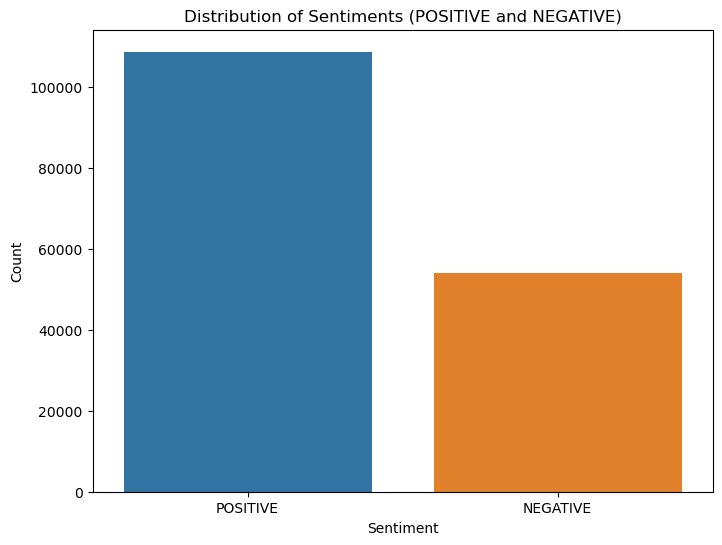

In [4]:
#Plot for the target variable (sentiment) distribution.
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_distribution = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments (POSITIVE and NEGATIVE)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [5]:
data_2.describe() #This is our movies dataset.

,audienceScore,runtimeMinutes
count,73248.000000,129431.000000
mean,55.674967,93.708578
std,24.553648,28.129175
min,0.000000,1.000000
25%,37.000000,84.000000
50%,57.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


> **There are a few outliers in terms of runtime, with some movies having an exceptionally long or short runtime.

In [6]:
movies_2=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

#Removing the duplicates in movies dataset w.r.t movieid column
movies_2.drop_duplicates(subset='movieid', keep='first', inplace=True)

In [7]:
#Merging movies and train dataset
m_1 = pd.merge(data, movies_2, on='movieid', how='left')

In [8]:
m_1.head() #Merged dataset

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


movies.csv --

> movieid : Common column for both movie and train dataset.

> title : Consist of title of the movie.

> audienceScore :  Score given by the general audience or viewers to a movie.

> rating : Film content ratings
           
           1.G: General Audiences
           
           2.PG: Parental Guidance Suggested 
           
           3.PG-13: Parents Strongly Cautioned 
           
           4.R: Restricted 
           
           5.NC-17: No Children 17 and Under Admitted
           
> ratingContents : Describes content-related information about the movies.

> releaseDateTheaters : Describes the date on which movie is released on theaters.

> releaseDateStreaming : Refers to the date on which a movie or content is made available for streaming on various platforms, such as streaming services like Netflix, Amazon Prime Video, Disney+, etc.

> runtimeMinutes : Duration of a movie.

> genre :  Refers to a category or classification of a movie based on its theme, style, and content. Action,Adventure,Drama,Thriller,Comedy,Animation,Fantasy,Sci-Fi,etc.

> originalLanguage : The language in which the movie originally made.

> director : Consists of Director's full name.

> boxOffice : Consists of total earning of a movie.

> distributor : Companies or entities responsible for acquiring the rights to distribute films to various theaters, platforms, or markets.

> soundType : Refers to the format or quality of the audio used in the film.

In [9]:
#Giving Top 5 reviewer of the movies
reviewer_counts = m_1['reviewerName'].value_counts()
print(reviewer_counts.head(5))

Sherri Morrison      962
Veronica Serrano     952
Mrs. Vickie Young    827
Kristy Ferguson      822
Heather Pena         797
Name: reviewerName, dtype: int64


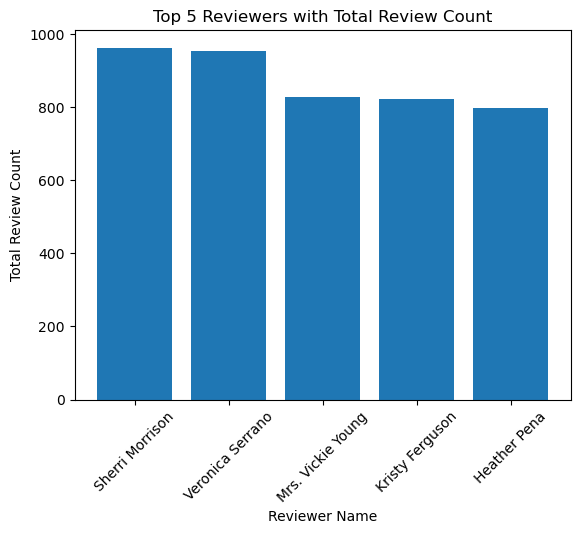

In [10]:
#Showing bar plot for the same
plt.bar(reviewer_counts.head(5).index, reviewer_counts.head(5).values)
plt.xlabel('Reviewer Name')
plt.ylabel('Total Review Count')
plt.title('Top 5 Reviewers with Total Review Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Data Analysis

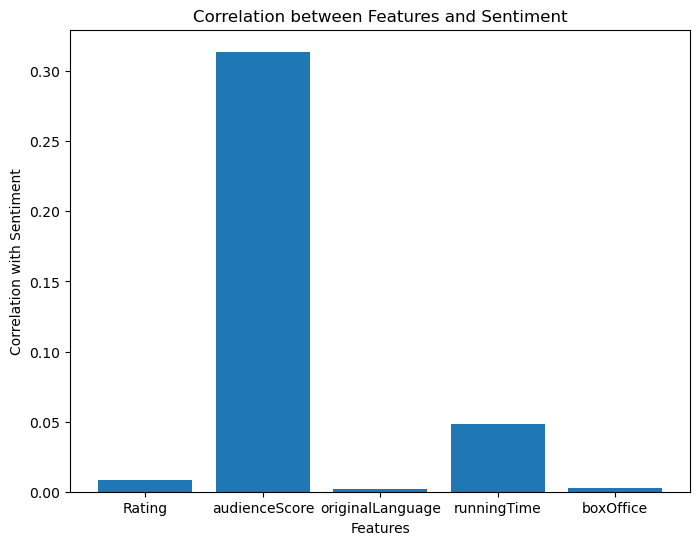

Correlation with 'sentiment' for Rating: 0.008428391632670727
Correlation with 'sentiment' for audienceScore: 0.31385513991494646
Correlation with 'sentiment' for originalLanguage: 0.0019913096513972813
Correlation with 'sentiment' for runningTime: 0.04796025534740458
Correlation with 'sentiment' for boxOffice: 0.002975812989267423


In [11]:
# Here I took 5 columns from merged dataset to show which features are more strongly correlated with the target label
#The bar plot is used to visualize and compare the correlation values of different features, allowing us to quickly identify which features may be more influential for sentiment prediction.
#Encoding Categorical Features

import pandas as pd
from sklearn.preprocessing import LabelEncoder


audience_score = m_1['audienceScore']
rat = m_1['rating']

#One-Hot-Encoding for rating column
rat_=pd.get_dummies(rat)

r_time=m_1['runtimeMinutes']
lang=m_1['originalLanguage']

#One-Hot-Encoding for originalLanguage column
lang_=pd.get_dummies(lang)

#Pre-processing boxOffice column
box=m_1['boxOffice']
box.fillna(box.mode()[0],inplace=True)

#Conversion of boxOffice values into numeric.
def money_to_numeric(money_str):
    if not money_str:  # Check if the string is empty
        return np.nan  # Return NaN for empty strings
    multiplier = 1
    if money_str[-1] == 'K':
        multiplier = 1000
        money_str = money_str[:-1]  # Removes 'K' from the end
    elif money_str[-1] == 'M':
        multiplier = 1000000
        money_str = money_str[:-1]  # Removes 'M' from the end
    try:
        value = float(money_str[1:])  # Removes the first character ('$') and convert to float
        return value * multiplier
    except:
        return np.nan
box=box.apply(money_to_numeric)

#Pre-processing for label (sentiment)
labels = m_1['sentiment']
#Encoded label to 0 and 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

#Calculated correlation between 'rating' and sentiment labels
correlation_text = pd.DataFrame(rat_).corrwith(pd.Series(y))
#Calculated correlation between 'originalLanguage' and sentiment labels
correlation_text_2 = pd.DataFrame(lang_).corrwith(pd.Series(y))

#Calculated correlation between 'audienceScore' and sentiment labels
correlation_numerical = audience_score.corr(pd.Series(y))
#Calculated correlation between 'runningTime' and sentiment labels
correlation_numerical_2 = r_time.corr(pd.Series(y))
#Calculated correlation between 'boxOffice' and sentiment labels
correlation_numerical_3 = box.corr(pd.Series(y))


# Step 3: Visualize the correlation
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Rating', 'audienceScore','originalLanguage','runningTime','boxOffice'], [correlation_text[0], correlation_numerical,correlation_text_2[0], correlation_numerical_2,correlation_numerical_3])
plt.xlabel('Features')
plt.ylabel('Correlation with Sentiment')
plt.title('Correlation between Features and Sentiment')
plt.show()

# Compare the correlation values
print("Correlation with 'sentiment' for Rating:", correlation_text[0])
print("Correlation with 'sentiment' for audienceScore:", correlation_numerical)
print("Correlation with 'sentiment' for originalLanguage:", correlation_text_2[0])
print("Correlation with 'sentiment' for runningTime:", correlation_numerical_2)
print("Correlation with 'sentiment' for boxOffice:", correlation_numerical_3)


In [12]:
#Xi=m_1.drop(columns='sentiment')
#yi=m_1['sentiment']

# Data Preprocessing ( Imputation, Scaling, Encoding, etc )

In [13]:
#Checking columns having missing values in merged dataset named m_1
#Counting the missing values for each column
columns_with_missing_values = m_1.isnull().sum()

# Display the columns with their corresponding count of missing values
print(columns_with_missing_values)

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice                   0
distributor             40663
soundType               85367
dtype: int64


> # First Approach ( Selection of 2 columns for prediction )

In [14]:
#Selected 2 most relevant columns in Xn and seperated label column in yn

Xn=m_1[['reviewText','audienceScore']]
yn=m_1['sentiment']

In [15]:
#Filled missing values with the most occuring value in their respective column

Xn['audienceScore'].fillna(Xn['audienceScore'].mode()[0],inplace=True)
Xn['reviewText'].fillna(Xn['reviewText'].mode()[0],inplace=True)

/tmp/ipykernel_20/3591454218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xn['audienceScore'].fillna(Xn['audienceScore'].mode()[0],inplace=True)
/tmp/ipykernel_20/3591454218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xn['reviewText'].fillna(Xn['reviewText'].mode()[0],inplace=True)


In [16]:
#Defined functions to remove special characters, numbers, etc from reviewText column
#Converted entire text to lowercase

def pre_process(txt):
  clear_txt = "!@#$%^&*()_-+=’{}[]|\:;'<>?,./\"0123456789"
  txt = ''.join(char for char in txt if char not in clear_txt)
  txt = txt.lower()
  return txt

#Defined another function that removes single letter word from reviewText column

def remove_one(text):
    words = text.split()
    words = [word for word in words if len(word) > 1]
    p_text = ' '.join(words)
    return p_text

In [17]:
#Applied above functions to the column having text value
Xn['reviewText']=Xn['reviewText'].apply(pre_process)
Xn['reviewText']=Xn['reviewText'].apply(remove_one)

/tmp/ipykernel_20/655159784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xn['reviewText']=Xn['reviewText'].apply(pre_process)
/tmp/ipykernel_20/655159784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xn['reviewText']=Xn['reviewText'].apply(remove_one)


In [18]:
#Splitting the data into training and validation

from sklearn.model_selection import train_test_split
Xn_train, Xn_val, yn_train, yn_val = train_test_split(Xn,yn,test_size=0.2,random_state=42)

# Feature Engineering - TF-IDF Vectorization

In [19]:
#Used the TfidfVectorizer to convert the text data into numerical vectors

from sklearn.feature_extraction.text import TfidfVectorizer
vectn = TfidfVectorizer()
Xn_t_tfidf=vectn.fit_transform(Xn_train['reviewText'])
Xn_v_tfidf=vectn.transform(Xn_val['reviewText'])

In [20]:
#Seperated audienceScore column for both training and validation set ( Converted to 2D Array )

Xn_t_a=Xn_train['audienceScore'].values.reshape(-1,1)
Xn_v_a=Xn_val['audienceScore'].values.reshape(-1,1)


#Concatenating the TF-IDF features with the 'audienceScore' column

import scipy.sparse as sp
Xn_t_f=sp.hstack((Xn_t_tfidf,Xn_t_a))
Xn_v_f=sp.hstack((Xn_v_tfidf,Xn_v_a))

In [21]:
#Created and trained the MultinomialNB model (**Hyperparameter-tuning applied in local colab file)
from sklearn.naive_bayes import MultinomialNB
mod_n = MultinomialNB(alpha=0.000402)
mod_n.fit(Xn_t_f, yn_train)

#Making predictions on the validation data
y_v_pred = mod_n.predict(Xn_v_f)

#Evaluating the model's performance
from sklearn.metrics import f1_score
scor=f1_score(yn_val,y_v_pred,average='micro')
scor

0.7628409928729417

> # Second Approach
**Data Preprocessing ( Considering reviewText as most relevant input )

In [22]:
#Seperating the data into feature and label
X=data['reviewText']
y=data['sentiment']

In [23]:
#Filling missing values with most occuring value
most_freq = X.mode()[0]
X.fillna(most_freq, inplace=True)

In [24]:
#Applied above methods to clean text in reviewText column 
X=X.apply(pre_process)
X=X.apply(remove_one)

In [25]:
#Splitting the data into train and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Engineering - TF-IDF and Count Vectorizer

In [26]:
#Used the TfidfVectorizer to convert the text data into numerical vectors with n-grams (word and word pairs).

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vect.fit_transform(X_train)
X_val_tfidf = vect.transform(X_val)

In [27]:
#Used the CountVectorizer to convert the text data into numerical vectors with n-grams (word and word pairs).

from sklearn.feature_extraction.text import CountVectorizer
vect_2=CountVectorizer(max_features=369900,ngram_range=(1,2))
X_train_count=vect_2.fit_transform(X_train)
X_val_count=vect_2.transform(X_val)

# Feature Selection

In [28]:
#Apply SelectKBest for feature selection
#Used chi-squared as the scoring function and selected the top features

'''from sklearn.feature_selection import SelectKBest, chi2
num_features_to_select = 69900
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_count, y_train)
X_val_selected = selector.transform(X_val_count)'''

#Commented as not giving much effect

'from sklearn.feature_selection import SelectKBest, chi2\nnum_features_to_select = 69900\nselector = SelectKBest(score_func=chi2, k=num_features_to_select)\nX_train_selected = selector.fit_transform(X_train_count, y_train)\nX_val_selected = selector.transform(X_val_count)'

> # 3rd Approach

In [29]:
#  STEP 1.------>
#Importing necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.compose import ColumnTransformer

#------------------------------------------------------------------------------------------------------#
#------------------------------------------------------------------------------------------------------#
#  STEP 2.------>
#Preprocessing data to make it ready for use.
#Copying train dataframe to 'train' variable
'''train=data
#Took out 2 columns from test_data
to_merge=test_data[['reviewerName','isTopCritic']]

#Grouped above selected columns according to the 'reviewerName' column.
gr = to_merge.groupby('reviewerName').agg({
    'isTopCritic': 'first',
}).reset_index()

#Now, merging above grouped columns in train data w.r.t 'reviewerName'.
new_merg=train.merge(gr,on='reviewerName',how='left')

#Defining another column in train data that contains the information of reviewers who are both frequent and critic.
new_merg['isFrequentAndTopCritic'] = new_merg['isFrequentReviewer'] & new_merg['isTopCritic']

#Now, grouping 2 columns of train data according to 'reviewerName' column.
mer_in_test=new_merg.groupby('reviewerName').agg({
    'isFrequentReviewer': 'first',
    'isFrequentAndTopCritic' : 'first'
}).reset_index()
#Merged above grouped columns in test_data. (New_test_data)
new_mer_test=test_data.merge(mer_in_test,on='reviewerName',how='left')
#Stored newly merged train data into 'data' variable
data=new_merg'''

#------------------------------------------------------------------------------------------------------#
#------------------------------------------------------------------------------------------------------#

#Imputation on movie and train data.
data_2['genre'].fillna(data_2['genre'].mode()[0],inplace=True)
data['reviewerName'].fillna(data['reviewerName'].mode()[0],inplace=True)
data_2['director'].fillna(data_2['director'].mode()[0],inplace=True)
data_2['originalLanguage'].fillna(data_2['originalLanguage'].mode()[0],inplace=True)
data_2['audienceScore'].fillna(data_2['audienceScore'].mode()[0],inplace=True)
data_2['rating'].fillna(data_2['rating'].mode()[0],inplace=True)
data['reviewText'].fillna(data['reviewText'].mode()[0],inplace=True)
data_2['runtimeMinutes'].fillna(data_2['runtimeMinutes'].mode()[0],inplace=True)
data_2['releaseDateStreaming'].fillna(data_2['releaseDateStreaming'].mode()[0],inplace=True)
data_2['releaseDateTheaters'].fillna(data_2['releaseDateTheaters'].mode()[0],inplace=True)
data_2['distributor'].fillna(data_2['distributor'].mode()[0],inplace=True)


#Conversion of 'releaseDateStreaming' column values into date-time.
data_2['releaseDateStreaming'] = pd.to_datetime(data_2['releaseDateStreaming'])
#Extracting and storing day of week from the date.
data_2['day_of_week'] = data_2['releaseDateStreaming'].dt.dayofweek


#Checking that day is weekend or not and storing in a column name 'is_weekend'
#As this information might be helpful in prediction as it tends to attract larger audiences.
#A larger audience can lead to a wider range of opinions and sentiments in movie reviews.
data_2['is_weekend'] = data_2['day_of_week'].isin([5, 6]).astype(int)
data_2['releaseDateTheaters'] = pd.to_datetime(data_2['releaseDateTheaters'])
data_2['day_of_week2'] = data_2['releaseDateTheaters'].dt.dayofweek
data_2['is_weekend2'] = data_2['day_of_week2'].isin([5, 6]).astype(int)


data_2['ratingContents'].fillna(data_2['ratingContents'].mode()[0],inplace=True)
#data_2['genre'].fillna(data_2['genre'].mode()[0],inplace=True)

def pre_process(txt):
  clear_txt = "[]'"
  txt = ''.join(char for char in txt if char not in clear_txt)
  txt = txt.lower()
  return txt
data_2['ratingContents']=data_2['ratingContents'].apply(pre_process)



#Grouped the columns from 'movie' dataset
grouped_df = data_2.groupby('movieid').agg({
    'audienceScore': 'mean',
    'runtimeMinutes': 'mean',
    'rating': 'first',
    'genre': 'first',
    'director': 'first',
    'originalLanguage': 'first'
}).reset_index()

grouped_df.head()  #Columns to be merged with train data

,movieid,audienceScore,runtimeMinutes,rating,genre,director,originalLanguage
0,adventure_anakin_skywalker,49.0,96.0,R,Comedy,Autumn Gonzalez,English
1,adventure_anakin_skywalker_chronicles_whisper,50.0,90.0,R,Drama,Mark Machado,English
2,adventure_astonish,40.0,90.0,R,Comedy,Doreen Edison,English
3,adventure_astonish_wondrous_beneath,60.0,96.0,R,Romance,Joshua Harper,English
4,adventure_aurora_epic,50.0,60.0,R,Drama,Abel Edwards,English


In [30]:
grouped_df.head(15)

,movieid,audienceScore,runtimeMinutes,rating,genre,director,originalLanguage
0,adventure_anakin_skywalker,49.0,96.0,R,Comedy,Autumn Gonzalez,English
1,adventure_anakin_skywalker_chronicles_whisper,50.0,90.0,R,Drama,Mark Machado,English
2,adventure_astonish,40.0,90.0,R,Comedy,Doreen Edison,English
3,adventure_astonish_wondrous_beneath,60.0,96.0,R,Romance,Joshua Harper,English
4,adventure_aurora_epic,50.0,60.0,R,Drama,Abel Edwards,English
5,adventure_aurora_gandalf,50.0,92.0,R,"Adventure, Drama",Pearl Gonzales,English
6,adventure_aurora_velvet_frodo_baggins,50.0,101.0,R,Comedy,Louise Garcia,English
7,adventure_beneath,50.0,14.0,R,Drama,Joseph Brooks,English
8,adventure_beneath_fortune,60.0,90.0,R,Drama,Joseph Brooks,English
9,adventure_black_widow,50.0,80.0,R,"Kids & family, Comedy, Adventure, Animation",Russell Chavez,German


In [31]:
#Making new columns from given information----------------------------------------------------------#
'''data['reviewText'].fillna(data['reviewText'].mode()[0],inplace=True)
train_grouped_df = data.groupby('movieid').agg({
    'reviewerName': ', '.join,
    'reviewText' : ' '.join
}).reset_index()
train_grouped_df

def count_names(names_str):
        return len(names_str.split(','))

# Apply the function to the 'names' column and store the result in a new column 'name_count'
train_grouped_df['reviewer_count'] = train_grouped_df['reviewerName'].apply(count_names)
train_grouped_df['total_review_text_length'] = (train_grouped_df['reviewText'].apply(lambda x: len(x.split())))//20
train_grouped_df['audienceEngagement'] = train_grouped_df['reviewer_count']*train_grouped_df['total_review_text_length']
#train_grouped_df=train_grouped_df.drop(columns='reviewerName')

train_grouped_df=train_grouped_df.drop(columns=['reviewerName','reviewText'])
t_merged_df = data.merge(train_grouped_df, on='movieid', how='left')'''
#------------------------------------------------------------------------------------------------------#

"data['reviewText'].fillna(data['reviewText'].mode()[0],inplace=True)\ntrain_grouped_df = data.groupby('movieid').agg({\n    'reviewerName': ', '.join,\n    'reviewText' : ' '.join\n}).reset_index()\ntrain_grouped_df\n\ndef count_names(names_str):\n        return len(names_str.split(','))\n\n# Apply the function to the 'names' column and store the result in a new column 'name_count'\ntrain_grouped_df['reviewer_count'] = train_grouped_df['reviewerName'].apply(count_names)\ntrain_grouped_df['total_review_text_length'] = (train_grouped_df['reviewText'].apply(lambda x: len(x.split())))//20\ntrain_grouped_df['audienceEngagement'] = train_grouped_df['reviewer_count']*train_grouped_df['total_review_text_length']\n#train_grouped_df=train_grouped_df.drop(columns='reviewerName')\n\ntrain_grouped_df=train_grouped_df.drop(columns=['reviewerName','reviewText'])\nt_merged_df = data.merge(train_grouped_df, on='movieid', how='left')"

In [32]:
#Merged above grouped set of movie column with 'train' dataset.

merged_df = data.merge(grouped_df, on='movieid', how='left')
Xi=merged_df.drop(columns='sentiment')
yi=merged_df['sentiment']

#Calculating reviewLength as it might be informative in terms of expressing sentiments.
Xi['reviewLength'] = Xi['reviewText'].apply(lambda x: len(x.split()))
#Xi['titleLength'] = Xi['title'].apply(lambda x: len(x.split()))
#Xi['Text_ratC']=Xi['reviewText']+' '+Xi['ratingContents']

#  STEP 3.------> 
#Importing necessary libraries to split merged data into train and validation.
from sklearn.model_selection import train_test_split
X__train, X_valid, y__train, y_valid = train_test_split(Xi, yi, test_size=0.2, random_state=42)

#Defined transformers for feature scaling, encoding, and vectorization
audience_score_transformer = StandardScaler()
rating_language_transformer = OneHotEncoder(handle_unknown='ignore')
review_text_transformer = TfidfVectorizer(ngram_range=(1,2))


#Created the column transformer with appropriate transformers for different columns.
preprocessor_3 = ColumnTransformer(transformers=[
    ('audience_score', audience_score_transformer, ['audienceScore']),
    ('category', rating_language_transformer, ['rating','originalLanguage','director','reviewerName','genre']),
    ('review_text', review_text_transformer, 'reviewText'),
    #('skip', 'passthrough', ['is_weekend2'])
])

#Fitting and transforming the data using the preprocessor for different columns
X_train__transformed = preprocessor_3.fit_transform(X__train)
X__val_transformed = preprocessor_3.transform(X_valid)

#------------------------------------------------------------------------------------------------------#
#Applied MultiLabelBinarizer separately for 'genre' and 'director' columns
#mlb_genre = MultiLabelBinarizer()
#mlb_director = MultiLabelBinarizer()

#genre_encoded = mlb_genre.fit_transform(merged_df['genre'].apply(lambda x: x.split(', ')))
#director_train_encoded = mlb_director.fit_transform(X__train['director'].apply(lambda x: x.split(', ')))
#director_val_encoded = mlb_director.transform(X_valid['director'].apply(lambda x: x.split(', ')))

#Created DataFrames for the binarized 'genre' and 'director' columns
#genre_df = pd.DataFrame(genre_encoded, columns=mlb_genre.classes_)
#director_train_df = pd.DataFrame(director_train_encoded)
#director_val_df = pd.DataFrame(director_val_encoded)

#Concatenated the binarized DataFrames with the original DataFrame
#X_train_f = pd.concat([pd.DataFrame(X_train_transformed), director_train_df], axis=1)
#X_val_f = pd.concat([pd.DataFrame(X_val_transformed), director_val_df], axis=1)


> # Feature selection ( Using SelectKBest )

In [33]:
#Importing libraries
from sklearn.feature_selection import SelectKBest, chi2,f_classif
num_features_to_select = 74728     #72740
selector_3 = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train__selected = selector_3.fit_transform(X_train__transformed, y__train)
X_val__selected = selector_3.transform(X__val_transformed)

> # Feature selection ( Using SelectFromModel )

In [34]:
#Used SelectFromModel feature selection method.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Created a logistic regression model with L1 regularization (Lasso)
logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, max_iter=2000)

# Created a SelectFromModel transformer using the logistic regression model
selector_3 = SelectFromModel(logreg)

# Fitted the selector on the transformed X_train and get the selected features
X_train__selected_3 = selector_3.fit_transform(X_train__transformed, y__train)

# Transformed X_val to keep only the selected features
X_val__selected_3 = selector_3.transform(X__val_transformed)

> # Fourth Approach ( Prediction after Balancing the data )

In [35]:
# Loading the data ( Separating it from above approaches )
import pandas as pd
train_csv=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
movies_csv=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
test_csv=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

In [36]:
#Checking Distribution of 'POSITIVE' and 'NEGATIVE' sentiments
print(train_csv[train_csv['sentiment']=='POSITIVE']['reviewerName'].shape)
print(train_csv[train_csv['sentiment']=='NEGATIVE']['reviewerName'].shape)

(108761,)
(53997,)


In [37]:

#Grouped the columns from 'movie' dataset
grouped_df_4 = data_2.groupby('movieid').agg({
    'audienceScore': 'mean',
    #'is_weekend' : 'first',
    #'is_weekend2' : 'first',
    'rating': 'first',
    'genre': ', '.join,
    'director': 'first',
    'originalLanguage': 'first',
    #'title': 'first',
    'distributor': 'first',
    'ratingContents': ','.join
                                    ###Rating has less impact-----
}).reset_index()
for i in range(len(grouped_df_4['genre'])):
    rating_contents = grouped_df_4.at[i, 'genre'].split(',')
    if len(rating_contents) > 1:
        grouped_df_4.at[i, 'genre'] = rating_contents[0]
    else:
        grouped_df_4.at[i, 'genre'] = rating_contents[0]
for i in range(len(grouped_df_4['ratingContents'])):
    rating_contents = grouped_df_4.at[i, 'ratingContents'].split(',')
    if len(rating_contents) > 1:
        grouped_df_4.at[i, 'ratingContents'] = rating_contents[0]
    else:
        grouped_df_4.at[i, 'ratingContents'] = rating_contents[0]


In [38]:
#Now merging train and grouped dataframe of movies dataset (picked from 3rd approach)
train_merge = train_csv.merge(grouped_df_4, on='movieid', how='left')

In [39]:
train_merge.shape

(162758, 12)

In [40]:
from sklearn.model_selection import train_test_split
data_train, data_val = train_test_split(train_merge,test_size=0.2,random_state=42)

In [41]:
#Separating rows with 'POSITIVE' sentiments in pos and rows with "NEGATIVE" sentiments in neg
pos=data_train[data_train['sentiment']=='POSITIVE']
neg=data_train[data_train['sentiment']=='NEGATIVE']

In [42]:
#Removing rows from 'pos' dataframe in which reviewer has done less than 25 positive reviews.
# All the rows containing those reviewer's who do less no of positive reviews are removed.

#Storing 'pos' dataframe in df
df=pos

# Step 1: Grouped the DataFrame by "reviewerName" and "sentiment"
grouped = df.groupby(['reviewerName', 'sentiment'])

# Step 2: Counted the number of positive reviews for each reviewer
positive_review_count = grouped.size().unstack().fillna(0).astype(int)

# Step 3: Identify reviewers with less than 25 positive reviews
reviewers_with_less_than_15_positive_reviews = positive_review_count['POSITIVE'] < 25

# Step 4: Create a list of reviewer names meeting the criteria
reviewers_to_remove = reviewers_with_less_than_15_positive_reviews[reviewers_with_less_than_15_positive_reviews].index.tolist()

# Step 5: Filter the original DataFrame
filtered_df_pos = df[~df['reviewerName'].isin(reviewers_to_remove)]

# Display the shape of resulting DataFrame
print("Filtered Positive reviews dataframe shape :", (filtered_df_pos).shape)

Filtered Positive reviews dataframe shape : (65723, 12)


In [43]:
#For the dataframe stored with negative sentiments in 'neg', I am adding those rows in which reviewer has done more than 75 negative reviews.
# Adding the data of all those reviewer's who do more negative reviews.

# Step 1: Grouped the DataFrame by "reviewerName" and "sentiment"
grouped = neg.groupby(['reviewerName', 'sentiment'])

# Step 2: Counted the number of negative reviews for each reviewer
review_count = grouped.size().unstack().fillna(0).astype(int)

reviewers_with_more_than_75_negative_reviews = review_count['NEGATIVE'] > 60

# Step 3: Create a list of reviewer names meeting the criteria
reviewers_to_add = reviewers_with_more_than_75_negative_reviews[reviewers_with_more_than_75_negative_reviews].index.tolist()

# Step 4: Filter the original DataFrame
#filtered_df_ = filtered_df[~filtered_df['reviewerName'].isin(reviewers_to_add)]
#print(filtered_df_)

# Step 5: Created additional rows for reviewers with more than 75 negative reviews
additional_rows = neg[neg['reviewerName'].isin(reviewers_to_add)]

# Concatenate the filtered DataFrame with the additional rows
filtered_df_neg = pd.concat([neg, additional_rows])

# Display the resulting DataFrame
print("Filtered negative review Dataframe shape: ",filtered_df_neg.shape)


Filtered negative review Dataframe shape:  (59792, 12)


In [44]:
#Concatenating the above two created dataframes-------
result_df=pd.concat([filtered_df_pos,filtered_df_neg],axis=0)
result_df.shape

(125515, 12)

In [45]:
#Shuffled above concatenated dataframe
final_data=result_df.sample(frac=1,random_state=140)

In [46]:
#Separating rows with 'POSITIVE' sentiments and 'NEGATIVE' sentiments
final_neg=final_data[final_data['sentiment']=='NEGATIVE']
final_pos=final_data[final_data['sentiment']=='POSITIVE']


In [47]:
#Filling missing values separately on both dataframe----
final_neg['reviewText']=final_neg['reviewText'].fillna(final_neg['reviewText'].mode()[0])
final_pos['reviewText']=final_pos['reviewText'].fillna(final_pos['reviewText'].mode()[0])

/tmp/ipykernel_20/2734765993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_neg['reviewText']=final_neg['reviewText'].fillna(final_neg['reviewText'].mode()[0])
/tmp/ipykernel_20/2734765993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_pos['reviewText']=final_pos['reviewText'].fillna(final_pos['reviewText'].mode()[0])


In [48]:
#Clearing the text of reviewText column having punctuations, symbols, numbers, etc.
def pre_process(txt):
  clear_txt = "!@#$%^&*()_-+=’{}[]|\:;'<>?,./\"0123456789"
  txt = ''.join(char for char in txt if char not in clear_txt)
  txt = txt.lower()
  return txt

final_neg['reviewText']=final_neg['reviewText'].apply(pre_process)
final_pos['reviewText']=final_pos['reviewText'].apply(pre_process)

/tmp/ipykernel_20/1753207746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_neg['reviewText']=final_neg['reviewText'].apply(pre_process)
/tmp/ipykernel_20/1753207746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_pos['reviewText']=final_pos['reviewText'].apply(pre_process)


In [49]:
#Finally concatenating the above two dataframes and shuffling the rows.
final_new=pd.concat([final_pos,final_neg],axis=0)
final_new_shuff=final_new.sample(frac=1,random_state=140)

In [50]:
Xn_train=final_new_shuff.drop('sentiment',axis=1)
yn_train=final_new_shuff['sentiment']

In [51]:
data_val['reviewText']=data_val['reviewText'].fillna(data_val['reviewText'].mode()[0])
data_val['reviewText']=data_val['reviewText'].apply(pre_process)

In [52]:
Xn_val=data_val.drop('sentiment',axis=1)
yn_val=data_val['sentiment']

In [53]:
Xn_val.shape

(32552, 11)

In [54]:
#X['reviewLength'] = X['reviewText'].apply(lambda x: len(x.split()))

In [55]:
#Applying encoding of categorical column and applying Tfidf to reviewText column-----
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.compose import ColumnTransformer

scale= MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
tfidf = TfidfVectorizer(ngram_range=(1,3),min_df=4,max_df=0.3)


#Created the column transformer with appropriate transformers for different columns.
preprocessor_4 = ColumnTransformer(transformers=[
    ('audience_score', scale, ['audienceScore']),
    ('category', ohe, ['movieid','genre']),
    ('review_text', tfidf, 'reviewText')
])

In [56]:
#Fitting the training data into preprocessor and transforming validation set.
X_train_ = preprocessor_4.fit_transform(Xn_train)
X_val_ = preprocessor_4.transform(Xn_val)

In [57]:
#Importing libraries
from sklearn.feature_selection import SelectKBest, chi2,f_classif
num_features_to_select = 51740     #72740
selector_4 = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train = selector_4.fit_transform(X_train_, yn_train)
X_val = selector_4.transform(X_val_)

# Models

# 1. LinearSVC

In [58]:
#CalibratedClassifierCV can calibrate the decision function of a classifier to provide class probabilities
#Used to make LinearSVC compatible with soft voting
#LinearSVC does not have a built-in method to directly provide class probabilities 

'''from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
sv=LinearSVC(C=1.0032233,max_iter=2000)

#Wrap LinearSVC with CalibratedClassifierCV
calibrated_linear_svc_model = CalibratedClassifierCV(sv, method='sigmoid')

#sv.fit(X_train_tfidf,y_train)
calibrated_linear_svc_model.fit(X_train_tfidf,y_train)

#Make predictions on the validation data
y_val_pred = calibrated_linear_svc_model.predict(X_val_tfidf)

##Evaluating the model's performance by following 2nd approach
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
#Calculating f1-score
scor=f1_score(y_val,y_val_pred,average='micro')
print('F1-score : (Following 2nd Approach)',scor)'''

"from sklearn.calibration import CalibratedClassifierCV\nfrom sklearn.svm import LinearSVC\nsv=LinearSVC(C=1.0032233,max_iter=2000)\n\n#Wrap LinearSVC with CalibratedClassifierCV\ncalibrated_linear_svc_model = CalibratedClassifierCV(sv, method='sigmoid')\n\n#sv.fit(X_train_tfidf,y_train)\ncalibrated_linear_svc_model.fit(X_train_tfidf,y_train)\n\n#Make predictions on the validation data\ny_val_pred = calibrated_linear_svc_model.predict(X_val_tfidf)\n\n##Evaluating the model's performance by following 2nd approach\nfrom sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix\n#Calculating f1-score\nscor=f1_score(y_val,y_val_pred,average='micro')\nprint('F1-score : (Following 2nd Approach)',scor)"

> # By using 3rd Approach

In [59]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
sv=LinearSVC(C=1.032233,max_iter=5000)

#Wrap LinearSVC with CalibratedClassifierCV
calibrated_linear_svc_model_final = CalibratedClassifierCV(sv, method='isotonic')

#sv.fit(X_train_tfidf,y_train)
calibrated_linear_svc_model_final.fit(X_train__selected_3 ,y__train)



#Make predictions on the validation data
y_val_pred = calibrated_linear_svc_model_final.predict(X_val__selected_3 )


> # Evaluation of Model

0.835954780044237
Classification Report for Validation:               precision    recall  f1-score   support

    NEGATIVE       0.77      0.71      0.74     10696
    POSITIVE       0.86      0.90      0.88     21856

    accuracy                           0.84     32552
   macro avg       0.82      0.80      0.81     32552
weighted avg       0.83      0.84      0.83     32552



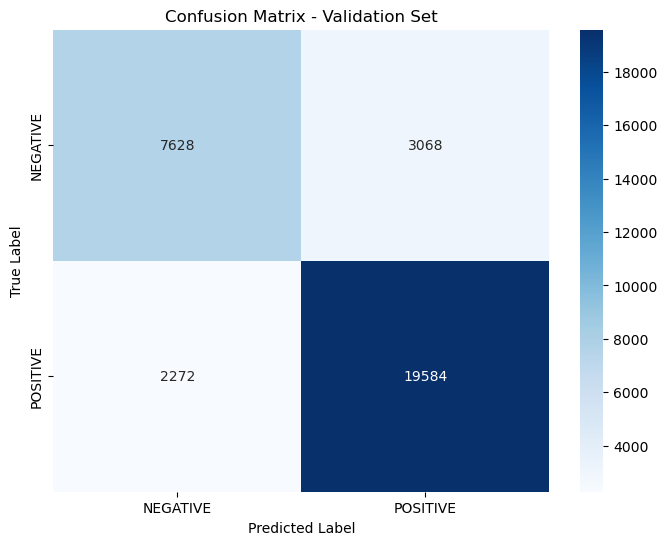

In [60]:
##Evaluating the model's performance
from sklearn.metrics import f1_score, classification_report, accuracy_score,confusion_matrix
scor=f1_score(y_valid,y_val_pred,average='micro')
print(scor)
print('Classification Report for Validation:',classification_report(y_valid,y_val_pred))
#print('Classification Report for Train:',classification_report(y__train,y_train_pred))

confusion_mtx = confusion_matrix(y_valid, y_val_pred)
from sklearn.preprocessing import LabelEncoder

# Encoding 'y_valid' :  the target labels for the validation set
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_valid)

# Plotting the confusion matrix
class_labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. LogisticRegression

In [61]:
#Importing LogReg
from sklearn.linear_model import LogisticRegression

#Initializing the LogReg model
logreg_model = LogisticRegression(solver='saga', max_iter=5000, random_state=42,C=0.402888)

#Training the model
logreg_model.fit(X_train_count, y_train)

#Make predictions on the validation data
y_val_pred = logreg_model.predict(X_val_count)

##Evaluating the model's performance (By using 2nd Approach)
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
scor=f1_score(y_val,y_val_pred,average='micro')
scor


0.814297124600639

In [62]:
#Hyper-parameter Tuning for LogReg (taking longer time)
'''logreg_model = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [1000, 2000, 5000]
}

grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1_micro')
grid_search.fit(X_train__selected, y__train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_'''

"logreg_model = LogisticRegression()\n\nparam_grid = {\n    'C': [0.01, 0.1, 1, 5, 10],\n    'penalty': ['l1', 'l2'],\n    'solver': ['liblinear', 'lbfgs', 'saga'],\n    'max_iter': [1000, 2000, 5000]\n}\n\ngrid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1_micro')\ngrid_search.fit(X_train__selected, y__train)\n\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_"

> # Using Pipeline

In [63]:
#Using Pipeline
'''from sklearn.pipeline import Pipeline
pipeline_steps = [
    ('countV', vect_2),        # Text feature extraction using CountVectorizer
    ('classifier', logreg_model) # Logistic Regression classifier
]

# Created the pipeline
pipeline = Pipeline(steps=pipeline_steps)

# Fit the pipeline on the training data
#pipeline.fit(X_train, y_train)

#y_pred = pipeline.predict(X_val)

##Evaluating the model's performance
from sklearn.metrics import f1_score, classification_report
scor=f1_score(y_val,y_pred,average='micro')
scor

print(classification_report(y_val, y_pred))'''

"from sklearn.pipeline import Pipeline\npipeline_steps = [\n    ('countV', vect_2),        # Text feature extraction using CountVectorizer\n    ('classifier', logreg_model) # Logistic Regression classifier\n]\n\n# Created the pipeline\npipeline = Pipeline(steps=pipeline_steps)\n\n# Fit the pipeline on the training data\n#pipeline.fit(X_train, y_train)\n\n#y_pred = pipeline.predict(X_val)\n\n##Evaluating the model's performance\nfrom sklearn.metrics import f1_score, classification_report\nscor=f1_score(y_val,y_pred,average='micro')\nscor\n\nprint(classification_report(y_val, y_pred))"

> # By using 3rd Approach (Merging datasets)

In [64]:
#Importing LogReg
from sklearn.linear_model import LogisticRegression

#Initializing the LogReg model
logreg_model_final = LogisticRegression(penalty='l2',solver='liblinear', max_iter=5000, random_state=42,C=7.402888)

#Training the model
logreg_model_final.fit(X_train__selected_3 , y__train)

y_train_pred = logreg_model_final.predict(X_train__selected_3 )
#Make predictions on the validation data
y_val_pred_ = logreg_model_final.predict(X_val__selected_3 )

> # Evaluation of the Model

0.836108380437454
Classification Report for Validation:               precision    recall  f1-score   support

    NEGATIVE       0.78      0.70      0.74     10696
    POSITIVE       0.86      0.90      0.88     21856

    accuracy                           0.84     32552
   macro avg       0.82      0.80      0.81     32552
weighted avg       0.83      0.84      0.83     32552



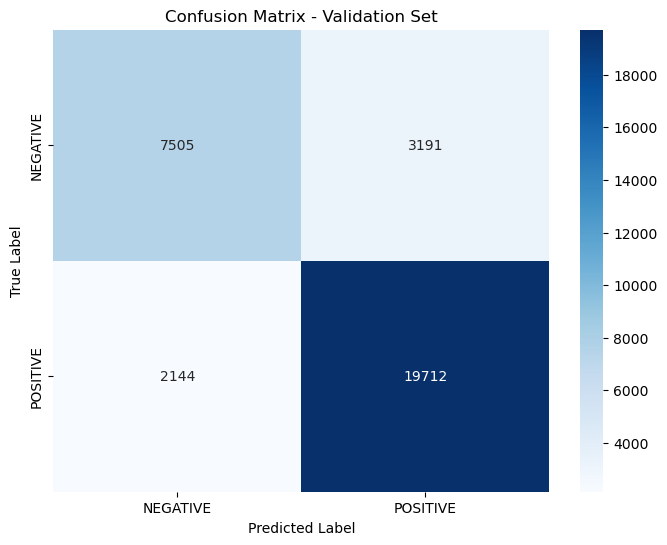

In [65]:
##Evaluating the model's performance
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
scor=f1_score(y_valid,y_val_pred_,average='micro')
print(scor)
print('Classification Report for Validation:',classification_report(y_valid,y_val_pred_))
#print('Classification Report for Train:',classification_report(y__train,y_train_pred))

confusion_mtx = confusion_matrix(y_valid, y_val_pred_)
# Plotting the confusion matrix
class_labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

> # By using Fourth Approach ( After Balancing the data )

In [66]:
#Importing LogReg
from sklearn.linear_model import LogisticRegression

#Initializing the LogReg model
logreg_model_final2 = LogisticRegression(solver='saga', max_iter=3000, random_state=42,C=2.402888)

#Training the model
logreg_model_final2.fit(X_train , yn_train)

#Prediction on train set (for checking accuracy)
y_train_pred = logreg_model_final2.predict(X_train)
#Make predictions on the validation data
y_val_pred_ = logreg_model_final2.predict(X_val)
from sklearn.metrics import f1_score, classification_report, accuracy_score,confusion_matrix
scor=f1_score(yn_val,y_val_pred_,average='micro')
print(scor)
print('Classification Report for Validation:',classification_report(yn_val,y_val_pred_))
print('Classification Report for Train:',classification_report(yn_train,y_train_pred))

0.823943229294667
Classification Report for Validation:               precision    recall  f1-score   support

    NEGATIVE       0.71      0.77      0.74     10696
    POSITIVE       0.88      0.85      0.87     21856

    accuracy                           0.82     32552
   macro avg       0.80      0.81      0.80     32552
weighted avg       0.83      0.82      0.83     32552

Classification Report for Train:               precision    recall  f1-score   support

    NEGATIVE       0.89      0.89      0.89     59792
    POSITIVE       0.90      0.90      0.90     65723

    accuracy                           0.89    125515
   macro avg       0.89      0.89      0.89    125515
weighted avg       0.89      0.89      0.89    125515



# 3. MultinomialNB

In [67]:
from sklearn.naive_bayes import MultinomialNB
mod = MultinomialNB(alpha=1.744)
mod.fit(X_train_count , y_train)

y_val_pred = mod.predict(X_val_count)
y_train_pred = mod.predict(X_train_count)


In [68]:
#Hyperparameter Tuning for MNB
#Performing hyperparameter tuning for MultinomialNB using GridSearchCV

'''from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
mnb_model = MultinomialNB()
param_grid = {'alpha': [0.1,1.0,2.0,0.5,0.9,0,2,3]}
grid_search = GridSearchCV(mnb_model, param_grid,cv=5, scoring='f1_micro')
grid_search.fit(X_train_selected, y_train)

#Finding the best model
best_mnb_model = grid_search.best_estimator_
y_val_pred = best_mnb_model.predict(X_val_selected)

from sklearn.metrics import f1_score
scor=f1_score(y_val,y_val_pred,average='micro')
scor'''

"from sklearn.naive_bayes import MultinomialNB\nfrom sklearn.model_selection import GridSearchCV\nmnb_model = MultinomialNB()\nparam_grid = {'alpha': [0.1,1.0,2.0,0.5,0.9,0,2,3]}\ngrid_search = GridSearchCV(mnb_model, param_grid,cv=5, scoring='f1_micro')\ngrid_search.fit(X_train_selected, y_train)\n\n#Finding the best model\nbest_mnb_model = grid_search.best_estimator_\ny_val_pred = best_mnb_model.predict(X_val_selected)\n\nfrom sklearn.metrics import f1_score\nscor=f1_score(y_val,y_val_pred,average='micro')\nscor"

> # Evaluation of the Model

0.8031457360530843
Classification Report for Validation:               precision    recall  f1-score   support

    NEGATIVE       0.81      0.53      0.64     10696
    POSITIVE       0.80      0.94      0.86     21856

    accuracy                           0.80     32552
   macro avg       0.80      0.73      0.75     32552
weighted avg       0.80      0.80      0.79     32552



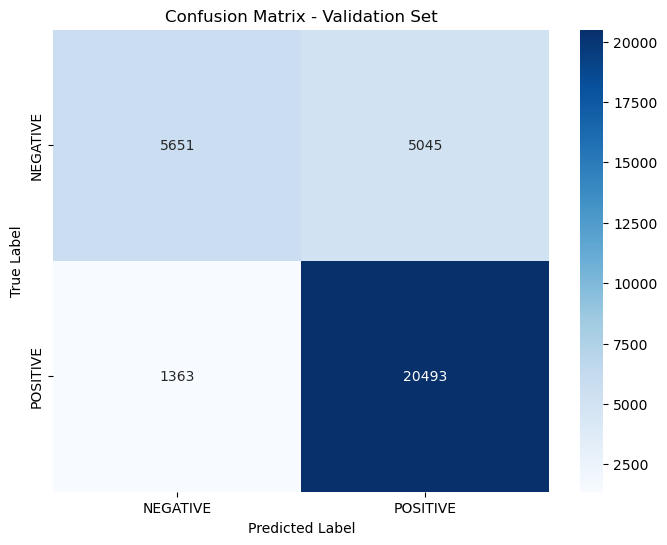

In [69]:
##Evaluating the model's performance
from sklearn.metrics import f1_score, classification_report, accuracy_score
scor=f1_score(y_val,y_val_pred,average='micro')
print(scor)
print('Classification Report for Validation:',classification_report(y_val,y_val_pred))
#print('Classification Report for Train:',classification_report(y__train,y_train_pred))

confusion_mtx = confusion_matrix(y_val, y_val_pred)
# Plot the confusion matrix
class_labels = label_encoder.classes_

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 4. GradientBoosting

In [70]:
'''from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_selected, y_train)

y_val_pred = gb_model.predict(X_val_selected)

from sklearn.metrics import f1_score
scor=f1_score(y_val,y_val_pred,average='micro')
scor'''

"from sklearn.ensemble import GradientBoostingClassifier\ngb_model = GradientBoostingClassifier(random_state=42)\ngb_model.fit(X_train_selected, y_train)\n\ny_val_pred = gb_model.predict(X_val_selected)\n\nfrom sklearn.metrics import f1_score\nscor=f1_score(y_val,y_val_pred,average='micro')\nscor"

> # Combining LogReg and MultinomialNB model

In [71]:
#Using Ensemble (VotingClassifier) with MNB and LinearRegression
#VotingClassifier combines the predictions of the different models 
'''from sklearn.ensemble import VotingClassifier

#Created the VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('mod', mod)],
    voting='soft',weights=[2,1])

#Trained the VotingClassifier
voting_classifier.fit(X_train_count, y_train)
#Make predictions on the validation set using the VotingClassifier
y_val_pred = voting_classifier.predict(X_val_count)

#Model Performance
from sklearn.metrics import f1_score, classification_report, accuracy_score
scor=f1_score(y_val,y_val_pred,average='micro')
scor'''

"from sklearn.ensemble import VotingClassifier\n\n#Created the VotingClassifier\nvoting_classifier = VotingClassifier(estimators=[\n    ('logreg', logreg_model),\n    ('mod', mod)],\n    voting='soft',weights=[2,1])\n\n#Trained the VotingClassifier\nvoting_classifier.fit(X_train_count, y_train)\n#Make predictions on the validation set using the VotingClassifier\ny_val_pred = voting_classifier.predict(X_val_count)\n\n#Model Performance\nfrom sklearn.metrics import f1_score, classification_report, accuracy_score\nscor=f1_score(y_val,y_val_pred,average='micro')\nscor"

> # Used For Final Submission

In [72]:
#Using Ensemble (VotingClassifier) with MNB and LinearRegression
#VotingClassifier combines the predictions of the different models 
from sklearn.ensemble import VotingClassifier

#Created the VotingClassifier
voting_classifier_final = VotingClassifier(estimators=[
    ('Caliberated_svc', calibrated_linear_svc_model_final),
    ('logreg', logreg_model_final)],
    voting='soft')

#Trained the VotingClassifier
voting_classifier_final.fit(X_train__selected_3 , y__train)

#Make predictions on the validation set using the VotingClassifier
y_val_pred__ = voting_classifier_final.predict(X_val__selected_3)
y_train_pred__ = voting_classifier_final.predict(X_train__selected_3)

##Evaluating the model's performance
from sklearn.metrics import f1_score, classification_report, accuracy_score
scor=f1_score(y_valid,y_val_pred__,average='micro')
print(scor)
print('Classification Report:',classification_report(y_valid,y_val_pred__))


0.8368763824035389
Classification Report:               precision    recall  f1-score   support

    NEGATIVE       0.78      0.71      0.74     10696
    POSITIVE       0.86      0.90      0.88     21856

    accuracy                           0.84     32552
   macro avg       0.82      0.80      0.81     32552
weighted avg       0.83      0.84      0.83     32552



> # HyperParameter Tuning---- (LogReg and LinearSVC)

In [73]:
'''from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score


#hyperparameter tuning for Logistic Regression
logreg_hyperparameters = {
    'C': np.linspace(0.1, 10, 50),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']
}
rs_logreg = RandomizedSearchCV(LogisticRegression(), logreg_hyperparameters, 
                               n_iter=3000, cv=5, random_state=42)
rs_logreg.fit(X_train__selected_3, y__train)
best_logreg = rs_logreg.best_estimator_



# Perform hyperparameter tuning for LinearSVC
linearsvc_hyperparameters = {
    'C': np.linspace(0.1, 10, 50),
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge']
}
rs_linearsvc = RandomizedSearchCV(LinearSVC(), linearsvc_hyperparameters, 
                                  n_iter=3000, cv=5, random_state=42)
rs_linearsvc.fit(X_train__selected_3, y__train)
best_linearsvc = rs_linearsvc.best_estimator_


# Create a VotingClassifier with the best estimators
voting_classifier = VotingClassifier(estimators=[
    ('logreg', best_logreg),
    ('linearsvc', best_linearsvc)
], voting='soft')

# Train the VotingClassifier on the training data
voting_classifier.fit(X_train__selected_3, y__train)

# Make predictions on the validation set
y_pred = voting_classifier.predict(X_val__selected_3)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy with VotingClassifier:", accuracy)

# Access the best hyperparameters for Logistic Regression and LinearSVC
print("Best hyperparameters for Logistic Regression:", rs_logreg.best_params_)
print("Best hyperparameters for LinearSVC:", rs_linearsvc.best_params_)'''


'from sklearn.ensemble import VotingClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import LinearSVC\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import train_test_split, RandomizedSearchCV\nfrom sklearn.metrics import accuracy_score\n\n\n#hyperparameter tuning for Logistic Regression\nlogreg_hyperparameters = {\n    \'C\': np.linspace(0.1, 10, 50),\n    \'penalty\': [\'l1\', \'l2\'],\n    \'solver\': [\'liblinear\', \'newton-cg\', \'lbfgs\', \'saga\']\n}\nrs_logreg = RandomizedSearchCV(LogisticRegression(), logreg_hyperparameters, \n                               n_iter=3000, cv=5, random_state=42)\nrs_logreg.fit(X_train__selected_3, y__train)\nbest_logreg = rs_logreg.best_estimator_\n\n\n\n# Perform hyperparameter tuning for LinearSVC\nlinearsvc_hyperparameters = {\n    \'C\': np.linspace(0.1, 10, 50),\n    \'penalty\': [\'l1\', \'l2\'],\n    \'loss\': [\'hinge\', \'squared_hinge\']\n}\nrs_linearsvc = RandomizedSear

# Some Insights

****LinearSVC, being a linear model, usually trains faster compared to the other two models, which can be beneficial for larger datasets.

****Multinomial Naive Bayes is specifically designed for text data, making it an appropriate choice for sentiment prediction based on movie reviews.

****Importance of fine-tuning model parameters to achieve the best results.

****Some features have had more impact on sentiment prediction, some have less.

****Combining the predictions of Multiple models using ensemble techniques like Voting Classifier exploited the strengths of individual models, leading to potentially improved performance.

****Better pre-processing gives better results.

****Logistic Regression is well-suited for binary classification tasks like sentiment prediction, where the target variable has two classes 

****Importance of gathering additional information through entire data.

# Top Words contributing to positive and negative sentiments

In [74]:
feature_names = vect_2.get_feature_names_out()

# Get the coefficients (weights) assigned to each feature (word) by the Logistic Regression model
feature_coefficients = logreg_model.coef_[0]

# Created a DataFrame to display the words and their corresponding coefficients
word_coefficient_df = pd.DataFrame({'Word': feature_names, 'Coefficient': feature_coefficients})

# Sorted the DataFrame based on the absolute value of coefficients in descending order
word_coefficient_df = word_coefficient_df.reindex(word_coefficient_df['Coefficient'].abs().sort_values(ascending=False).index)


positive_words_df = word_coefficient_df[word_coefficient_df['Coefficient'] > 0]

# Sort the DataFrame based on the positive coefficients in descending order
positive_words_df = positive_words_df.sort_values(by='Coefficient', ascending=False)

# Display the top words contributing to positive sentiment
print("Top Words Contributing to Positive Sentiment:")
print(positive_words_df.head(10))

negative_words_df = word_coefficient_df[word_coefficient_df['Coefficient'] < 0]

# Sort the DataFrame based on the negative coefficients
negative_words_df = negative_words_df.sort_values(by='Coefficient', ascending=True)

# Display the top words contributing to negative sentiment
print("\nTop Words Contributing to Negative Sentiment:")
print(negative_words_df.head(10))

Top Words Contributing to Positive Sentiment:
               Word  Coefficient
132513  masterpiece     1.768097
34206   brilliantly     1.662011
127877     long but     1.646207
55428    delightful     1.622181
86027           gem     1.558851
353425    wonderful     1.542990
306216     terrific     1.514593
67291     enjoyable     1.505834
24660     bad thing     1.474319
69666     even when     1.471522

Top Words Contributing to Negative Sentiment:
                 Word  Coefficient
333266        unfunny    -2.344085
333208  unfortunately    -2.246010
58913   disappointing    -2.183129
72842           fails    -2.128156
136396        misfire    -2.117559
31158           bland    -2.104947
125392       lifeless    -2.011838
122163          lacks    -1.964401
324223       tiresome    -1.962833
333376     uninspired    -1.921653


# Preprocessing Test data

In [75]:
#Seperated feature
#X_test=test_data['reviewText']

In [76]:
#Replacing missing values with most occuring
#new_mer_test['reviewText'].fillna(new_mer_test['reviewText'].mode()[0],inplace=True)
#new_mer_test['reviewerName'].fillna(new_mer_test['reviewerName'].mode()[0],inplace=True)

In [77]:
test_data['reviewText'].fillna(test_data['reviewText'].mode()[0],inplace=True)
test_data['reviewerName'].fillna(test_data['reviewerName'].mode()[0],inplace=True)

In [78]:
#Merged test(new_mer_test) and movies data (grouped).
#test_merged_df = new_mer_test.merge(grouped_df, on='movieid', how='left')
#test_merged_df['reviewLength'] = test_merged_df['reviewText'].apply(lambda x: len(x.split()))

In [79]:
#Merged test and movies data (grouped)
test_merged_df = test_data.merge(grouped_df, on='movieid', how='left')

In [80]:
#Applying preprocessor consisting of scaling, encoding, vectorization
X__test_transformed = preprocessor_3.transform(test_merged_df)
X__test_transformed2 = selector_3.transform(X__test_transformed)

In [81]:
#Applying CountVectorizer to convert text into numerical feature
#X_test_count=vect_2.transform(X_test)

In [82]:
#Making predictions on the test data using the VotingClassifier
y_test_pred = voting_classifier_final.predict(X__test_transformed2)

In [83]:
#Shape of final predicted label
y_test_pred.shape

(55315,)

# Final Submission

In [84]:
#Final submission
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range(len(y_test_pred))]
submission['sentiment']=y_test_pred
submission.to_csv('submission.csv',index=False)

In [85]:
submission.shape


(55315, 2)